Imports

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

In [30]:
x_train = np.load("./datasets/train_data.npy")
y_train = np.load("./datasets/train_labels.npy")
x_test = np.load("./datasets/test_data.npy")
y_test = np.load("./datasets/test_labels.npy")

num_classes =7
print("\nFinal Train Shapes: ")
print("Data:   ", x_train.shape)
print("Labels: ", y_train.shape)
print("\nFinal Test Shapes")
print("Data:   ", y_test.shape)
print("Labels: ", x_test.shape)



Final Train Shapes: 
Data:    (16800, 28, 28)
Labels:  (16800,)

Final Test Shapes
Data:    (2800,)
Labels:  (2800, 28, 28)


Visualize Labels

In [31]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

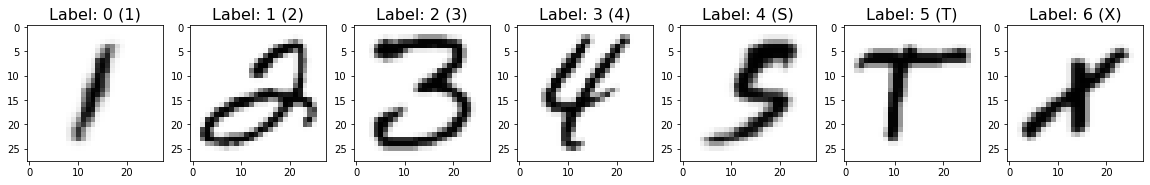

In [32]:
mapp = pd.read_csv(
    "./datasets/new_mapping.txt", delimiter=" ", index_col=0, header=None, squeeze=True
)
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap="Greys")
  label=("Label: {}".format(i) + ' (' + chr(mapp[i])+')')
  ax[i].set_title(label, fontsize=16)


Prepare Data

In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [33]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]* x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]* x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

(16800, 784)
(2800, 784)


In [34]:
model  = keras.Sequential()

model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 7)                 1799      
                                                                 
Total params: 535,047
Trainable params: 535,047
Non-trainable params: 0
_________________________________________________________________


In [35]:
batch_size = 128
epochs = 16

#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[keras.metrics.Recall()])
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


#history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
#history = model.fit(x_train, train_y_library, batch_size=batch_size, epochs=epochs, validation_data=(x_test,test_y_library))
history_library = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/16
132/132 [==============================] - 2s 7ms/step - loss: 0.2970 - accuracy: 0.9049 - val_loss: 0.1463 - val_accuracy: 0.9575
Epoch 2/16
132/132 [==============================] - 1s 6ms/step - loss: 0.1123 - accuracy: 0.9668 - val_loss: 0.1147 - val_accuracy: 0.9657
Epoch 3/16
132/132 [==============================] - 1s 8ms/step - loss: 0.0704 - accuracy: 0.9779 - val_loss: 0.0878 - val_accuracy: 0.9750
Epoch 4/16
132/132 [==============================] - 1s 8ms/step - loss: 0.0518 - accuracy: 0.9829 - val_loss: 0.0910 - val_accuracy: 0.9757
Epoch 5/16
132/132 [==============================] - 1s 7ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0901 - val_accuracy: 0.9768
Epoch 6/16
132/132 [==============================] - 1s 7ms/step - loss: 0.0331 - accuracy: 0.9889 - val_loss: 0.0782 - val_accuracy: 0.9782
Epoch 7/16
132/132 [==============================] - 1s 7ms/step - loss: 0.0226 - accuracy: 0.9926 - val_loss: 0.0840 - val_accuracy: 0.9800
Epoch 

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.10662686824798584
Test accuracy: 0.979285717010498


In [26]:
history_library.history

{'loss': [0.2964276969432831,
  0.11219769716262817,
  0.07363991439342499,
  0.05423275753855705,
  0.03749863803386688,
  0.03186390548944473,
  0.023176567628979683,
  0.020795069634914398,
  0.016865180805325508,
  0.015379024669528008,
  0.016639670357108116,
  0.014350892044603825,
  0.011263742111623287,
  0.01442097406834364,
  0.011067421175539494,
  0.01053073350340128],
 'accuracy': [0.9079166650772095,
  0.9674404859542847,
  0.9770833253860474,
  0.9834523797035217,
  0.9882143139839172,
  0.9894047379493713,
  0.9917262196540833,
  0.9937499761581421,
  0.9944047331809998,
  0.9947023987770081,
  0.994523823261261,
  0.995119035243988,
  0.9957143068313599,
  0.995119035243988,
  0.9961904883384705,
  0.996488094329834],
 'val_loss': [0.14845599234104156,
  0.11084652692079544,
  0.09608448296785355,
  0.08365047723054886,
  0.08624991774559021,
  0.0949329063296318,
  0.08699601143598557,
  0.0908527746796608,
  0.09050475805997849,
  0.09163105487823486,
  0.08949129283

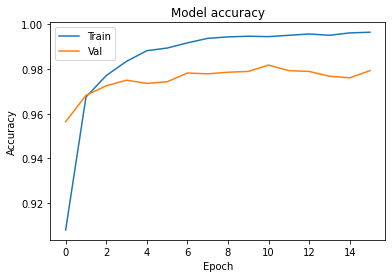

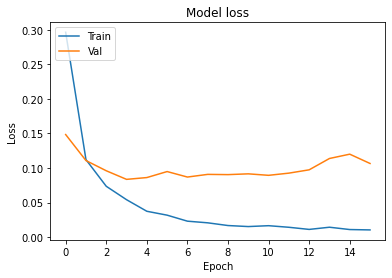

In [27]:
# Plot training & validation accuracy values
plt.plot(history_library.history['accuracy'])
plt.plot(history_library.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_library.history['loss'])
plt.plot(history_library.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Fully Connected Neural Network

In [10]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 7)                 903       
                                                                 
Total params: 117,895
Trainable params: 117,895
Non-trainable params: 0
_________________________________________________________________


Train

In [11]:
batch_size=512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
33/33 [==============================] - 1s 8ms/step - loss: 0.7853 - accuracy: 0.7757
Epoch 2/10
33/33 [==============================] - 0s 7ms/step - loss: 0.2451 - accuracy: 0.9247
Epoch 3/10
33/33 [==============================] - 0s 7ms/step - loss: 0.1788 - accuracy: 0.9465
Epoch 4/10
33/33 [==============================] - 0s 6ms/step - loss: 0.1404 - accuracy: 0.9589
Epoch 5/10
33/33 [==============================] - 0s 5ms/step - loss: 0.1173 - accuracy: 0.9672
Epoch 6/10
33/33 [==============================] - 0s 5ms/step - loss: 0.0965 - accuracy: 0.9716
Epoch 7/10
33/33 [==============================] - 0s 5ms/step - loss: 0.0835 - accuracy: 0.9744
Epoch 8/10
33/33 [==============================] - 0s 5ms/step - loss: 0.0730 - accuracy: 0.9796
Epoch 9/10
33/33 [==============================] - 0s 6ms/step - loss: 0.0645 - accuracy: 0.9810
Epoch 10/10
33/33 [==============================] - 0s 5ms/step - loss: 0.0562 - accuracy: 0.9831


Evaluate

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

88/88 [==============================] - 1s 3ms/step - loss: 0.0997 - accuracy: 0.9700
Test Loss: 0.09967295080423355, Test Accuracy: 0.9700000286102295


In [13]:

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

[[4.3829331e-08 6.2904651e-06 5.8812644e-09 ... 7.7938509e-08
  1.0416378e-08 9.9999249e-01]
 [5.2844007e-05 1.8002498e-05 9.9912411e-01 ... 7.1363192e-04
  4.6486362e-05 2.8387129e-05]
 [3.2834591e-06 9.9997187e-01 1.1338921e-05 ... 1.9489096e-06
  3.8551238e-07 1.1133390e-05]
 ...
 [1.2590531e-03 3.5759330e-02 8.8846294e-04 ... 1.2920829e-04
  9.5923173e-01 2.3246794e-03]
 [9.9696976e-01 8.9875219e-05 2.8036977e-05 ... 7.5156418e-06
  5.5586966e-04 2.0988018e-03]
 [3.3929481e-04 4.7899375e-04 1.3127521e-05 ... 2.1278756e-04
  7.1064843e-04 9.9793184e-01]]
[6 2 1 ... 5 0 6]


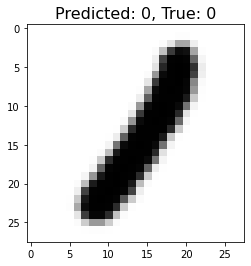

In [14]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='Greys')

Confusion Matrix

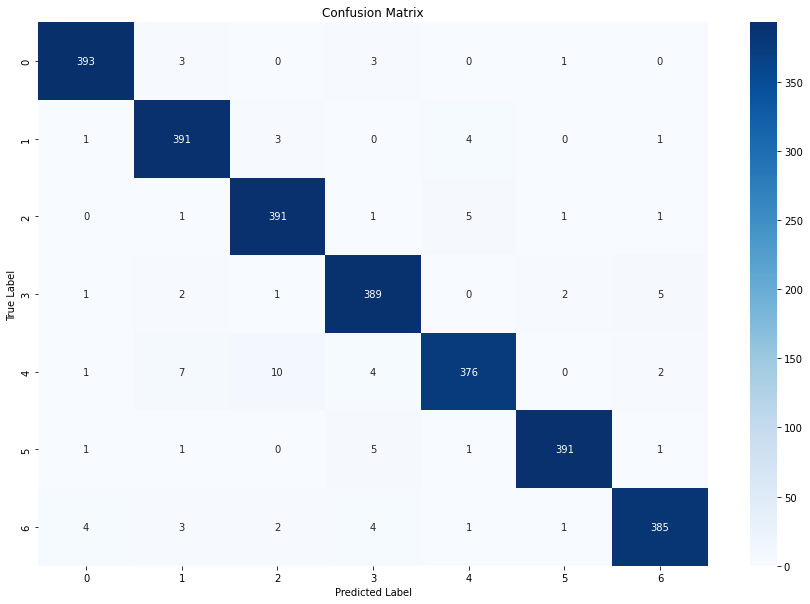

In [15]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

Errors

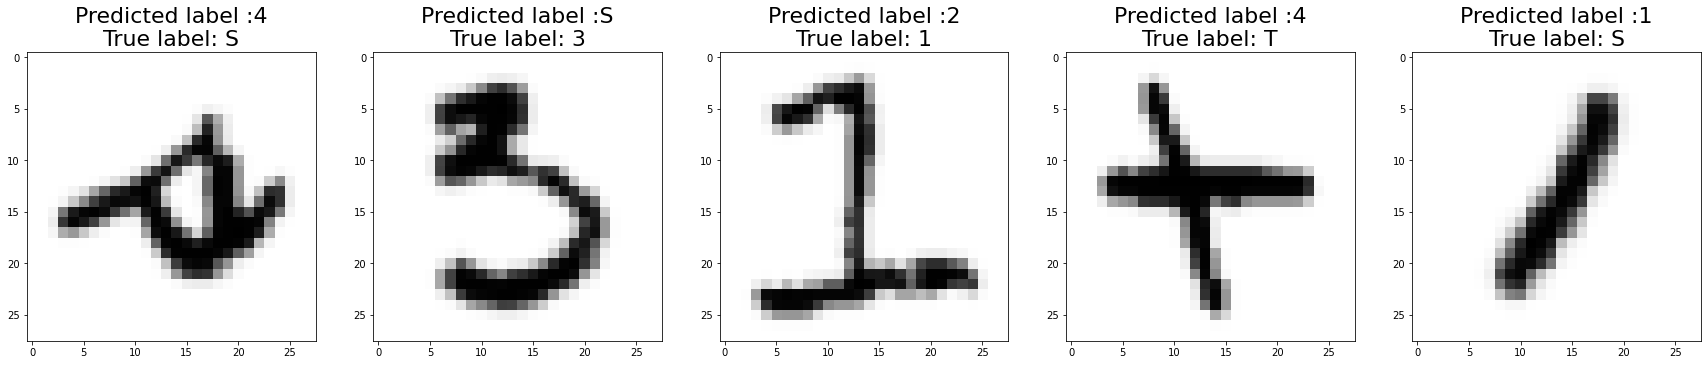

In [16]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='Greys')
  label=("Predicted label :"+ chr(mapp[y_p]) + '\nTrue label: ' + chr(mapp[y_t]))
  ax[i].set_title(label, fontsize=22)



Save Model

In [36]:
model.save('./models/model.h5')